In [29]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')

In [30]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
# dataset = dataset.drop(columns=['No.','flight'])

In [32]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:, 1] = le.fit_transform(dataset.iloc[:, 1])
dataset.iloc[:, 4] = le.fit_transform(dataset.iloc[:, 4])
dataset.iloc[:, 5] = le.fit_transform(dataset.iloc[:, 5])

In [34]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset = sc.fit_transform(dataset)

In [36]:
dataset

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [37]:
# dataset = pd.DataFrame(data=dataset)

In [38]:
X = dataset[:, 0:6]
Y = dataset[:, -1]

In [39]:
X

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [40]:
Y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, random_state=42)

In [42]:
X_train.shape

(1070, 6)

In [43]:
X_test.shape

(268, 6)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [45]:
# define the keras model
model = Sequential(name='sequential_1')
model.add(Dense(12, input_dim=6, activation='relu', name='dense_1'))
model.add(Dense(1,  activation='linear', name='output'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

In [46]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [48]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=107)

Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1186 - mae: 0.2588
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0409 - mae: 0.1607
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0205 - mae: 0.1074
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0175 - mae: 0.0973
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0151 - mae: 0.0975
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0838
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0780
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0112 - mae: 0.0756
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0692
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0689
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - lo

In [49]:
hist.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', '_supports_tf_logs', 'history', 'params', 'epoch'])

In [50]:
hist.history.keys()

dict_keys(['loss', 'mae'])

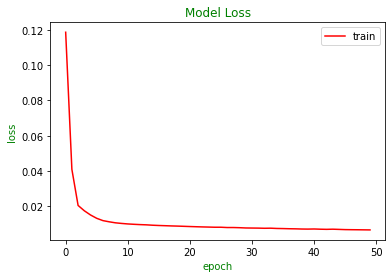

<Figure size 432x288 with 0 Axes>

In [51]:
from matplotlib import pyplot as plt
# plot training loss
loss = hist.history['loss']
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

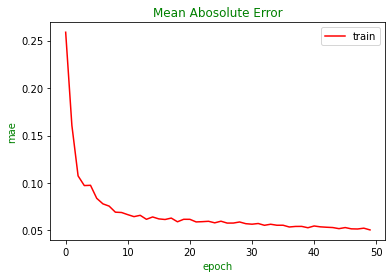

<Figure size 432x288 with 0 Axes>

In [52]:
# plot training loss
mae = hist.history['mae']
plt.plot(mae, color='red')
plt.title('Mean Abosolute Error', color='green')
plt.ylabel('mae', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('mae_curve.png')

In [53]:
history_test = model.evaluate(X_test, Y_test, batch_size=107)

3/3 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0542


In [54]:
history_train = model.evaluate(X_train, Y_train, batch_size=107)

10/10 [==============================] - 0s 4ms/step - loss: 0.0066 - mae: 0.0554


In [55]:
history_test

[0.006207541096955538, 0.054210275411605835]

In [56]:
history_train

[0.006645784247666597, 0.0553973950445652]